# This notebook explains the functions available at 

# "PSV_dir_predictions.py"


Used to do the theoretical predictions of directional PSV analyses from a simplified GGP model (Brandt et al., 2019, submited). 


The file **PSV_dir_predictions** contains functions that calculates:

1) Variances and covariances of the mean zonal field **B** given by a giant Gaussian Process (GGP) model

2) The directional probability density function of directional distribution given by a zonal GGP model $s(u)$ and $s_r(u)$

3) Theoretical mean ($\overline{x_E}$,$\overline{x_N}$) and standard deviations of equal area coordinates $\sigma_E$ and $\sigma_N$, elongation $E'$ and overall variability $A_{dir}$. 

This notebook shows some examples of the use of these functions.


**Please note that the equal area projection coordinates given here are called **x and y** , which are respectively $x_E$ and $x_N$.**


In [1]:
import PSV_dir_predictions as psv


import matplotlib.pyplot as plt
import numpy as np


\begin{array}{rrrr} \hline
 & CP88 & QC96 & CJ98 & CP88-0 & QC96-0 & CJ98-0 & TK03.GAD\\ \hline
E(g_1^0) & -30.0 & -30.0 & -30.0 & -30.0 & -30.0 & -30.0 & -18.0 \\ \hline
E(g_2^0) & -1.8 & -1.2 & -1.5 & 0 & 0 & 0 & 0 \\ \hline
\sigma_1^0 & 3.0 & 3.0 & 11.72 & 3.0 & 3.0 & 11.72 &\beta\sigma_l = 6.4 \\ \hline
\sigma_1^1 & 3.0 & 3.0 & 1.67 & 3.0 & 3.0 & 1.67 & \sigma_l = 1.7 \\ \hline
\sigma_2^0 & \sigma_l = 2.14 & 1.3 & 1.16 & \sigma_l = 2.14 & 1.3 & 1.16 & \sigma_l = 0.6 \\ \hline
\sigma_2^1 & \sigma_l = 2.14 & 4.3 & 4.06 & \sigma_l = 2.14 & 4.3 & 4.06 & \beta\sigma_l = 2.2\\ \hline
\sigma_2^2 & \sigma_l = 2.14 & 1.3 & 1.16 & \sigma_l = 2.14 & 1.3 & 1.16 & \sigma_l = 0.6 \\ \hline
\alpha & 27.7 &27.7 & 15.0 & 27.7 &27.7 & 15.0 & 7.5 \\ \hline
\beta & 1 & 1 & 1 & 1 & 1 & 1 & 3.8 \\ \hline
\end{array}

Any GGP model will be described as a distionary:


**GGP_TK03_GAD =  {"g10" : -18, "g20" : 0.0, "g30" : 0.0, "sig10" : 0.0, "sig11": 0.0,
            "sig20" : 0.0, "sig21" : 0.0, "sig22" : 0.0, "alpha": 7.5, "beta": 3.8, "name":'TK03_GAD'}**
            



In [2]:
GGP_BCE19_GAD = {"g10" : -18, "g20" : 0.0, "g30" : 0.0, "sig10" : 0.0, "sig11": 0.0,
            "sig20" : 0.0, "sig21" : 0.0, "sig22" : 0.0, "alpha": 6.7, "beta": 4.2, "name":'BCE19_GAD'}
GGP_TK03_GAD =  {"g10" : -18, "g20" : 0.0, "g30" : 0.0, "sig10" : 0.0, "sig11": 0.0,
            "sig20" : 0.0, "sig21" : 0.0, "sig22" : 0.0, "alpha": 7.5, "beta": 3.8, "name":'TK03_GAD'}
GGP_CP88 = {"g10" : -30, "g20" : -1.8, "g30" : 0.0, "sig10" : 3.0, "sig11": 3.0,
            "sig20" : 0.0 , "sig21" : 0.0, "sig22" : 0.0, "alpha": 27.7, "beta": 1.0, "name":'CP88'}
GGP_CP88_GAD = {"g10" : -30, "g20" : 0.0, "g30" : 0.0, "sig10" : 3.0, "sig11": 3.0,
            "sig20" : 0.0 , "sig21" : 0.0, "sig22" : 0.0, "alpha": 27.7, "beta": 1.0, "name":'CP88_GAD'}
GGP_QC96 = {"g10" : -30, "g20" : -1.2, "g30" : 0.0, "sig10" : 3.0, "sig11": 3.0,
            "sig20" : 1.3 , "sig21" : 4.3, "sig22" : 1.3, "alpha": 27.7, "beta": 1.0, "name":'QC96'}
GGP_QC96_GAD = {"g10" : -30, "g20" : 0.0, "g30" : 0.0, "sig10" : 3.0, "sig11": 3.0,
            "sig20" : 1.3 , "sig21" : 4.3, "sig22" : 1.3, "alpha": 27.7, "beta": 1.0, "name":'QC96_GAD'}
GGP_CJ98 = {"g10" : -30, "g20" : -1.5, "g30" : 0.0, "sig10" : 11.72, "sig11": 1.67,
            "sig20" : 1.16 , "sig21" : 4.06, "sig22" : 1.16, "alpha": 15.0, "beta": 1.0, "name":'CJ98'}
GGP_CJ98_GAD =  {"g10" : -30, "g20" : 0.0, "g30" : 0.0, "sig10" : 11.72, "sig11": 1.67,
            "sig20" : 1.16 , "sig21" : 4.06, "sig22" : 1.16, "alpha": 15.0, "beta": 1.0, "name":'CJ98_GAD'}

For calculating the standard deviation of each gauss coefficient ${\sigma_l^m}$ you can use:


**s_lmGGP(deg,GGP)** function

where deg is the maximum l degree you want in the list and GGP is the dictionary e.g.  GGP_CJ98 (above)


Where: 

\begin{equation*}
(\sigma^m_l)^2=(\sigma_l)^2,even\\
(\sigma^m_l)^2=(\beta\sigma_l)^2,odd\\
\end{equation*}

For other models:

\begin{equation*}
(\sigma_l)^2=\frac{(c/a)^{2l}\alpha^2}{(l+1)(2l+1)},   l>2\\
\end{equation*}

\begin{equation*}
c/a = 0.547\\
\end{equation*}


In [3]:
GGP = GGP_BCE19_GAD
deg = 4

# Calulating the standard deviation s_l^m of each gaussian coefficiente g_l^m for a GGP model up to the degree 'deg'.  
all_s,degrees = psv.s_lmGGP(deg,GGP)

for i in range(len(all_s)):
    print('degree:' , end="")
    print(degrees[i], end="")
    print(', slm : %.1f' %(all_s[i]))


degree:[1 0], slm : 6.3
degree:[1 1], slm : 1.5
degree:[1 1], slm : 1.5
degree:[2 0], slm : 0.5
degree:[2 1], slm : 2.2
degree:[2 1], slm : 2.2
degree:[2 2], slm : 0.5
degree:[2 2], slm : 0.5
degree:[3 0], slm : 0.9
degree:[3 1], slm : 0.2
degree:[3 1], slm : 0.2
degree:[3 2], slm : 0.9
degree:[3 2], slm : 0.9
degree:[3 3], slm : 0.2
degree:[3 3], slm : 0.2
degree:[4 0], slm : 0.1
degree:[4 1], slm : 0.4
degree:[4 1], slm : 0.4
degree:[4 2], slm : 0.1
degree:[4 2], slm : 0.1
degree:[4 3], slm : 0.4
degree:[4 3], slm : 0.4
degree:[4 4], slm : 0.1
degree:[4 4], slm : 0.1


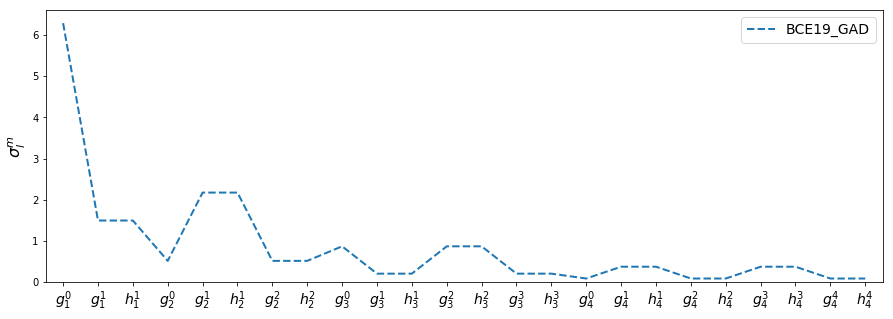

In [4]:
plt.figure(figsize=[15,5])
x = np.arange(0,len(all_s),1)
xTicks = []
for i in range(len(degrees)):
    if degrees[i][1]==0:
        xTicks = np.append(xTicks,'$g_{'+ np.str(degrees[i][0])+'}^0$')
        g=0
    else:
        if g==0:
            xTicks = np.append(xTicks,'$g_{'+ np.str(degrees[i][0])+'}^{'+np.str(degrees[i][1])+'}$')
            g=1
        else:
            xTicks = np.append(xTicks,'$h_{'+ np.str(degrees[i][0])+'}^{'+np.str(degrees[i][1])+'}$')
            g=0
plt.xticks(x, xTicks)
plt.xticks(range(len(xTicks)), xTicks,rotation=0,fontsize=14) #writes strings with 45 degree angle

plt.plot(x,all_s,'--',markersize = 2,label=GGP['name'],lw=2)
plt.axis(ymin=0,xmin=-0.5,xmax=len(all_s)-0.5)
plt.ylabel('$\sigma_l^m$', fontsize=16)
plt.legend(fontsize=14)
plt.show()

You can calculate the variance of each component of the field **B** using:



The variance in r using **sig_br2** function
\begin{equation*}
{\sigma_{B_r}}^2=\sum_{l=1}^{\inf}(l+1)^2\left[{\sigma^0_l}^2{P_{l,0}}^2 + 2\sum_{m=1}^{l}{\sigma_l^m}^2\frac{(l-m)!}{(l+m)!}{P_{l,m}}^2\right]\\
\end{equation*}

The variance in $\Theta$ using **sig_bt2** function

\begin{equation*}
{\sigma_{B_{\Theta}}}^2=\sum_{l=1}^{\inf}\left[{\sigma^0_l}^2{\left(\frac{dP_{l,0}}{d\Theta}\right)}^2 + 2\sum_{m=1}^{l}{\sigma_l^m}^2\frac{(l-m)!}{(l+m)!}{\left(\frac{dP_{l,m}}{d\Theta}\right)}^2\right]\\
\end{equation*}

The variance in $\phi$ using **sig_bph2** function

\begin{equation*}
{\sigma_{B_{\phi}}}^2=\frac{2}{sin^2\Theta}\sum_{l=1}^{\inf}\sum_{m=1}^{l}m^2{\sigma_l^m}^2\frac{(l-m)!}{(l+m)!}{P_{l,m}}
^2\\
\end{equation*}


Co-variance $Cov(B_r,B_{\Theta})$ **cov_br_bt** function

\begin{equation*}
Cov(B_r,B_{\Theta})=- \sum_{l=0}^{\inf}(l+1){\left(\frac{a}{r}\right)}^{2l+4}\left[{\sigma_l^0}^2P_{l,0}\frac{dP_{l,0}}{d\Theta}+2\sum_{m=1}^{l}{\sigma_l^m}^2\frac{(l-m)!}{(l+m)!}P_{l,m}\frac{dP_{l,m}}{d\Theta}\right]\\
\end{equation*}


Co-variance $Cov(B_\phi,B_{\Theta})=0$


Co-variance $Cov(B_r,B_{\phi})=0$


Cov matrix using **Cov** function 



 $Cov = \begin{bmatrix} 
    \sigma^2_{B_\Theta}       & 0 & Cov(B_\Theta,B_r) \\
    0       & \sigma^2_{B_\Phi} & 0\\
    Cov(B_\Theta,B_r)       & 0 & \sigma^2_{B_r}
\end{bmatrix}$



Where $P_l^m$ depends on co-latitude $\Theta$:
\begin{equation*}
P_l^m = P_{l,m}, m=0\\
P_l^m = [\frac{2(l-m)!}{(l+m)!}]^\frac{1}{2}P_{l,m}, m>0\\
\end{equation*}

\begin{equation*}
P_{l,m}(cos\theta) = \frac{sin^m\theta}{2^l}\sum_{t=0}^{Int(\frac{l-m}{2})}\frac{(-1)^t(2l-2t)!}{t!(l-t)!(l-m-2t)!}cos^{l-m-2t}\theta\\
\end{equation*}
Where $Int(\frac{l-m}{2})$ is the highest integer smaller than $\frac{l-m}{2}$ 





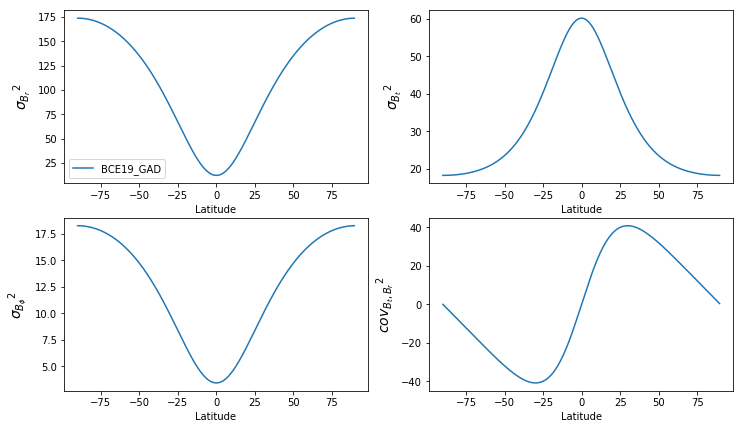

In [5]:
#####################################################################################################
##   Insert here the latitudes you want calculate 'lats' and the model you want to use 'GGP'    #####

lats = np.arange(-90,90,0.5)
GGP = GGP_BCE19_GAD
degree = 8


#####################################################################################################

SigBr2 =np.zeros_like(lats)
SigBt2 = np.zeros_like(lats)
SigBph2 = np.zeros_like(lats)
SigBrBt2 = np.zeros_like(lats)
for i in range(len(lats)):
    
    Cov = psv.Cov_modelo(GGP,lats[i],degree)
    SigBr2[i] = Cov[2,2]
    SigBt2[i] = Cov[0,0]
    SigBph2[i] = Cov[1,1]
    SigBrBt2[i] = Cov[2,0]

plt.figure(figsize=[12,7])
plt.subplot(221)

plt.plot(lats,SigBr2,'-', label=GGP['name'])
plt.legend()

plt.xlabel('Latitude')
plt.ylabel('${\sigma_{B_r}}^2$', fontsize=14)
plt.subplot(222)
plt.plot(lats,SigBt2,'-')
plt.xlabel('Latitude')
plt.ylabel('${\sigma_{B_{t}}}^2$', fontsize=14)
plt.subplot(223)
plt.plot(lats,SigBph2,'-')
plt.xlabel('Latitude')
plt.ylabel('${\sigma_{B_{\phi}}}^2$', fontsize=14)
plt.subplot(224)
plt.plot(lats,SigBrBt2,'-')
plt.xlabel('Latitude')
plt.ylabel('${cov_{B_t,B_r}}^2$', fontsize=14)


plt.show()

# Probability density function of a GGP model of unitary vectors at a given latitude 


$s(u) = e^{-\frac{1}{2}m^2}.\frac{\sqrt{det\Lambda}}{4\pi|u|_{\Lambda}^3}\bigg[z\frac{2}{\pi} + e^{\frac{1}{2}z^2}(1+z^2)\Big[1+Erf(\frac{z}{\sqrt{2}})\Big]\bigg]  $ s(u) is the distribution of directional vectors u

Where making use of the $\Lambda$-norm : $|x|_{\Lambda}=\sqrt{(x,x)_{\Lambda}}$



$ z = \frac{(m,u)_{\Lambda}}{|u|_{\Lambda}}$



$ m = |m|_{\Lambda} $



$ u = (u_1, u_2, u_3)$ unitary vector




For using the coordinates x,y (or $x_E, x_N$) from equal area projection we should use the following:


$ x = x_E = \frac{\sqrt{1-|u_3|}}{\sqrt{u_1^2+u_2^2}}u_2$

$ y = x_N = \frac{\sqrt{1-|u_3|}}{\sqrt{u_1^2+u_2^2}}u_1$

$u = (y\frac{\sqrt{1-(1-x^2-y^2)^2}}{\sqrt{x^2+y^2}},x\frac{\sqrt{1-(1-x^2-y^2)^2}}{\sqrt{x^2+y^2}},\pm(1-x^2-y^2)) $

$ m = (m_1, m_2, m_3) = (B_x,B_y,B_z) = (-B_{\Theta},B_{\Phi},-B_{r})$ is the predicted field for the place ($\Theta, \Phi$ are co-Latitude and Longitude).


$\Lambda = Cov(B,B)^{-1}$

### For rotated distribution (around the expected direction):

If we use the distribution around the expected direction, we rotate the sistem of coordinates to the vertical $(0,0)$:

Then the vector m should be  changed by:

$ m = (0,0,|B|)$ where $ |B| = \sqrt{B_{\Theta}^2 + B_{\Phi}^2 +B_{r}^2}$

The rotation Tensor  T used is:



$ T = \begin{bmatrix}
    \cos{(90-inc_m)}       & 0 & \sin{(90-inc_m)}\\
    0       & 1 & 0\\
    -\sin{(90-inc_m)}       & 0 & \cos{(90-inc_m)} 
\end{bmatrix}$

where the $inc_m$ is the inclination of the predicted field diretion **m** in degrees

The Covariance matrix rotated to the new coordinate is 

$Cov_{ROT} = TCovT^{T}$


### Available functions:

For a map of density function of a GGP model predicted in a latitude you use:
**prediction_map_GGP_su**



For the rotated version use:
**prediction_map_GGP_su_r**

1) Input:

- GGP: a dictionary with the informations about the model
- Lat: latitude
- degree: Maximum degree for calculating the covariance matrix of the field B (default is 8)
- dx: spacement you want to map (default is 0.01)
- dy: spacement you want to map (default is 0.01)

2) Output

- Two maps (sp and sn) of s(u) normalized -> one array with three columns: x,y and su





Original Distribution


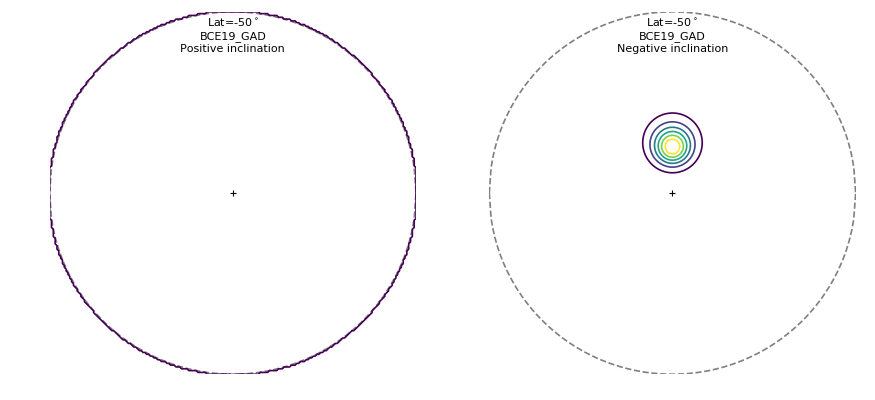

Rotated Distribution


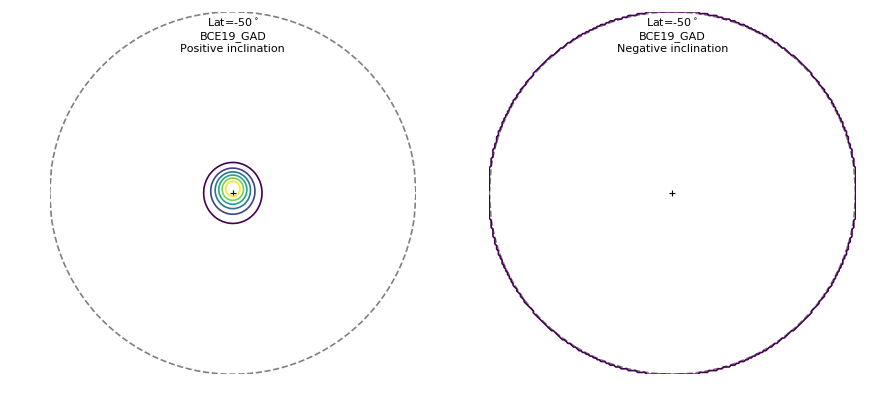

In [8]:
#####################################################################################################
##   Insert here the latitude you want calculate 'lat' and the model you want to use 'GGP'    #######
##  dx and dy are the spacing used for equal area coordinates                                 #######


GGP= GGP_BCE19_GAD
lat=-50
dx=0.01
dy=0.01
degree = 8

#####################################################################################################
print('Original Distribution')
### UN-ROTATED
sp, sn = psv.prediction_map_GGP_su(lat,GGP,degree, dx, dy)

psv.plotmap(sp, sn,GGP,lat,dx,dy)

print('Rotated Distribution')
### ROTATED WITH THE EXPECTED DIRECTION IN THE VERTICAL
sp, sn = psv.prediction_map_GGP_su_r(lat,GGP,degree, dx, dy)
psv.plotmap(sp, sn,GGP,lat,dx,dy)

# PSV prediction quantities

The directional quantities presented by Brandt et al. (2019) are:


${\sigma_{x}}^2 = \int \int {(x-\overline{x}))^2s(x,y)dx dy}$   (note that $x=x_E$ and $y=x_N$, following the notation from Brandt et al., 2019, submited)



${\sigma_{y}}^2 = \int \int {(y-\overline{y})^2s(x,y)dx dy}$


$ \overline{x} = \int \int {x.s(x,y)dx dy}$


$\overline{y} = \int \int {y.s(x,y)dx dy}$



Numerical integration using dx and dy intervals are used in:


**prediction_x_y_std_E_A_GGP**

it returns an array with 7 columns:


Mod[:,0] = latitudes (if only one latitude is given, then it returns a line)


Mod[:,1] = x = $x_E$


Mod[:,2] = y = $x_N$


Mod[:,3] = sigmax = $\sigma_E$


Mod[:,4] = sigmay = $\sigma_N$


Mod[:,5] = E'


Mod[:,6] = Adir = $\sqrt{det(\Sigma_{x,y})}$ =  $\sqrt{\sigma_x^2\sigma_y^2 - cov(x,y)^2}$








In [9]:
#######################################################################################################
##   Insert here the latitudes you want calculate 'lats' and the model you want to use 'GGP'    #######

lats = np.arange(-90,90,5)
GGP = GGP_TK03_GAD

Mod = psv.prediction_x_y_std_E_A_GGP(lats,GGP)



Calculating for the latitude:
-90
Calculating for the latitude:
-85
Calculating for the latitude:
-80
Calculating for the latitude:
-75
Calculating for the latitude:
-70
Calculating for the latitude:
-65
Calculating for the latitude:
-60
Calculating for the latitude:
-55
Calculating for the latitude:
-50
Calculating for the latitude:
-45
Calculating for the latitude:
-40
Calculating for the latitude:
-35
Calculating for the latitude:
-30
Calculating for the latitude:
-25
Calculating for the latitude:
-20
Calculating for the latitude:
-15
Calculating for the latitude:
-10
Calculating for the latitude:
-5
Calculating for the latitude:
0
Calculating for the latitude:
5
Calculating for the latitude:
10
Calculating for the latitude:
15
Calculating for the latitude:
20
Calculating for the latitude:
25
Calculating for the latitude:
30
Calculating for the latitude:
35
Calculating for the latitude:
40
Calculating for the latitude:
45
Calculating for the latitude:
50
Calculating for the latitude

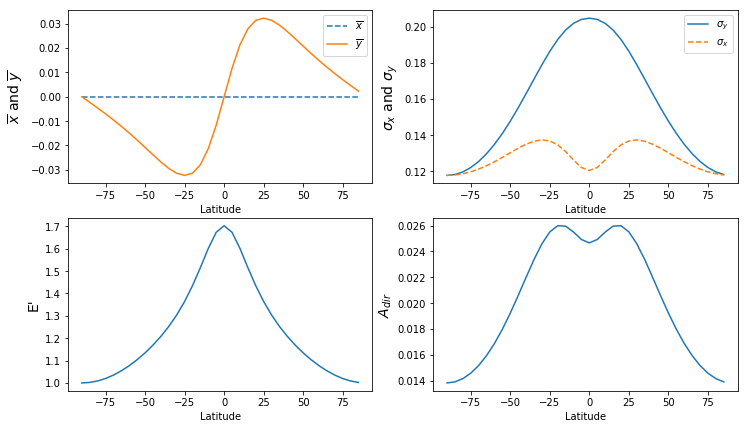

In [10]:
lats = Mod[:,0]
x = Mod[:,1]
y = Mod[:,2] 
sigmax = Mod[:,3] 
sigmay = Mod[:,4] 
Eprime = Mod[:,5] 
Adir = Mod[:,6] 





plt.figure(figsize=[12,7])
plt.subplot(221)

plt.plot(lats,x,'--', label='$\overline{x}$')
plt.plot(lats,y,'-', label='$\overline{y}$')
plt.legend()

plt.xlabel('Latitude')
plt.ylabel('$\overline{x}$ and $\overline{y}$', fontsize=14)
plt.subplot(222)
plt.plot(lats,sigmay,'-',label='$\sigma_y$')
plt.plot(lats,sigmax,'--',label='$\sigma_x$')
plt.xlabel('Latitude')
plt.legend()
plt.ylabel('$\sigma_x$ and $\sigma_y$', fontsize=14)
plt.subplot(223)
plt.plot(lats,Eprime,'-')
plt.xlabel('Latitude')
plt.ylabel("E'", fontsize=14)
plt.subplot(224)
plt.plot(lats,Adir,'-')
plt.xlabel('Latitude')
plt.ylabel('$A_{dir}$', fontsize=14)


plt.show()